# ** Machine learning approach to model antidote against snake venom - [Part 4] - Regression Model with Random Forest Algorithm**

In this Jupyter notebook, we are building a machine learning model using the ChEMBL bioactivity data to predict the bioactivity of compounds against snake venom.

In **Part 4**, we will be building a regression model of phospholipase A2 inhibitors using the random forest algorithm.

---

## **1. Import libraries**

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

## **2. Load the data set**

In [ ]:
! wget https://github.com/Ankeet-Ak/biotechnologybtechproject/blob/main/Phospholipase_A2_bioactivity_data_3class_pubchem_fp_pIC50.csv

--2025-01-10 14:40:25--  https://github.com/Ankeet-Ak/biotechnologybtechproject/blob/main/Phospholipase_A2_bioactivity_data_3class_pubchem_fp_pIC50.csv
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘Phospholipase_A2_bioactivity_data_3class_pubchem_fp_pIC50.csv’

Phospholipase_A2_bi     [ <=>                ]   1.19M  --.-KB/s    in 0.07s   

2025-01-10 14:40:26 (15.9 MB/s) - ‘Phospholipase_A2_bioactivity_data_3class_pubchem_fp_pIC50.csv’ saved [1248751]



In [ ]:
df = pd.read_csv('Phospholipase_A2_bioactivity_data_3class_pubchem_fp_pIC50.csv')

## **3. Input features**
The ***Acetylcholinesterase*** data set contains 881 input features and 1 output variable (pIC50 values).

### **3.1. Input features**

In [ ]:
X = df.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
596,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
597,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
598,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### **3.2. Output features**

In [ ]:
Y = df.pIC50
Y

0      5.522879
1      6.638272
2      5.468521
3      5.769551
4      5.301030
         ...   
595    7.920819
596    7.154902
597    6.040959
598    4.619789
599    7.552842
Name: pIC50, Length: 600, dtype: float64

### **3.3. Let's examine the data dimension**

In [ ]:
X.shape

(600, 881)

In [ ]:
Y.shape

(600,)

### **3.4. Remove low variance features**

In [ ]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = selection.fit_transform(X)

In [ ]:
X.shape

(600, 124)

## **4. Data split (80/20 ratio)**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
X_train.shape, Y_train.shape

((480, 124), (480,))

In [ ]:
X_test.shape, Y_test.shape

((120, 124), (120,))

## **5. Building a Regression Model using Random Forest**

In [ ]:
import numpy as np
np.random.seed(100)
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.33671678435795704

In [ ]:
Y_pred = model.predict(X_test)

## **6. Scatter Plot of Experimental vs Predicted pIC50 Values**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show(*args, **kw)>

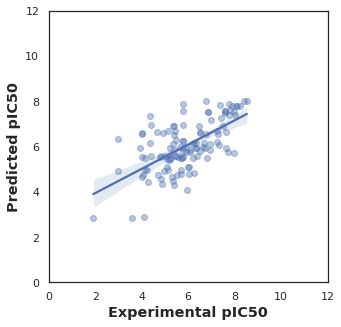

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(Y_test, Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show